# resources
+ https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/
+ https://www.otexts.org/fpp/7/5

In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
df = as_tibble(read.csv('./data/train_1.csv'))

In [11]:
df = df %>% arrange(desc(X2015.07.01))

In [127]:
options(repr.plot.width=8, repr.plot.height=3)

In [24]:
library(ggplot2)

In [27]:
df %>% head(5)

Page,X2015.07.01,X2015.07.02,X2015.07.03,X2015.07.04,X2015.07.05,X2015.07.06,X2015.07.07,X2015.07.08,X2015.07.09,⋯,X2016.12.22,X2016.12.23,X2016.12.24,X2016.12.25,X2016.12.26,X2016.12.27,X2016.12.28,X2016.12.29,X2016.12.30,X2016.12.31
Main_Page_en.wikipedia.org_all-access_all-agents,20381245,20752194,19573967,20439645,20772109,22544669,21210887,19107911,19993848,⋯,24201081,22539246,25056620,25865746,28342885,26916991,27025053,26073819,24363967,26149541
Main_Page_en.wikipedia.org_desktop_all-agents,11952559,12344021,11195848,11982470,12379684,14164829,12917172,11089923,12067334,⋯,18583108,16634676,18554711,18918826,21473188,20065005,19751910,19211634,17100925,19591761
Main_Page_en.wikipedia.org_mobile-web_all-agents,8039732,8018607,7980511,8024814,7929962,7959839,7892357,7607871,7515302,⋯,3892453,3816041,3728439,4168094,4243273,4097335,4168668,4100929,4118692,3939419
Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents,2983623,2965848,2900702,2687450,2827409,3062343,2999196,2995270,2995810,⋯,3517877,3520937,3188722,3643490,3903606,3907598,3732014,3577128,3514084,3286214
Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents,2038711,2036661,2021334,2002972,2049018,2037067,2026156,2023076,2017539,⋯,1692848,1698963,1711396,1777967,1792983,1747623,1724028,1720079,1696262,1699720


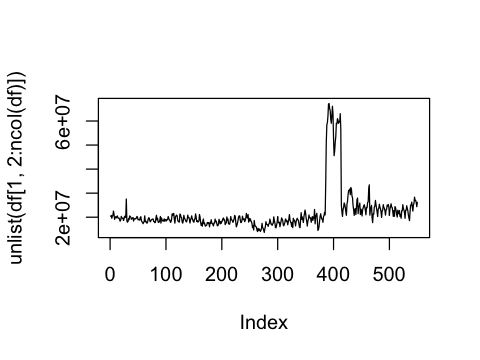

In [39]:
plot(unlist(df[1,2:ncol(df)]), type="l")

#plot(unlist(df[2,2:ncol(df)]), type="l")
#plot(unlist(df[3,2:ncol(df)]), type="l")
#plot(unlist(df[4,2:ncol(df)]), type="l")

In [106]:
df.to.use = unlist(df[3,2:ncol(df)])

In [107]:
t(df.to.use)

X2015.07.01,X2015.07.02,X2015.07.03,X2015.07.04,X2015.07.05,X2015.07.06,X2015.07.07,X2015.07.08,X2015.07.09,X2015.07.10,⋯,X2016.12.22,X2016.12.23,X2016.12.24,X2016.12.25,X2016.12.26,X2016.12.27,X2016.12.28,X2016.12.29,X2016.12.30,X2016.12.31
8039732,8018607,7980511,8024814,7929962,7959839,7892357,7607871,7515302,7362132,⋯,3892453,3816041,3728439,4168094,4243273,4097335,4168668,4100929,4118692,3939419


In [108]:
df.ts = ts(df.to.use, frequency=365, start=c(2015,7,1))

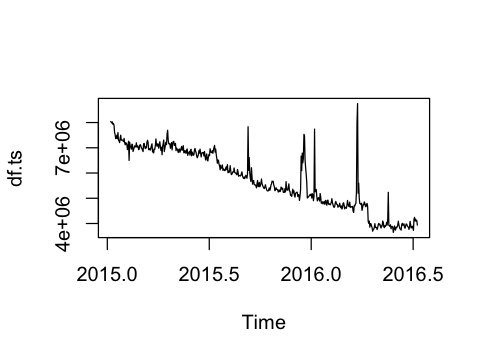

In [109]:
plot.ts(df.ts)

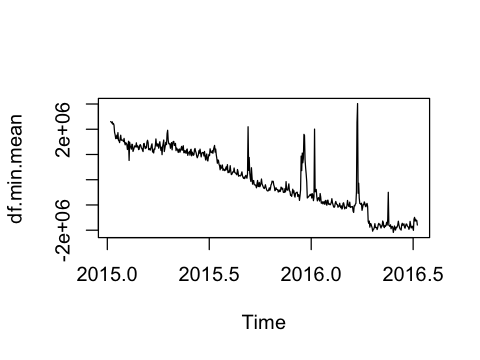

In [110]:
df.min.mean = df.ts - mean(df.ts)
plot.ts(df.min.mean)

In [111]:
length(df.ts)

[1] 550

In [112]:
library(corrplot)

In [116]:
X1 = df.ts[1:(length(df.ts)-1)]
X2 = df.ts[2:(length(df.ts))]

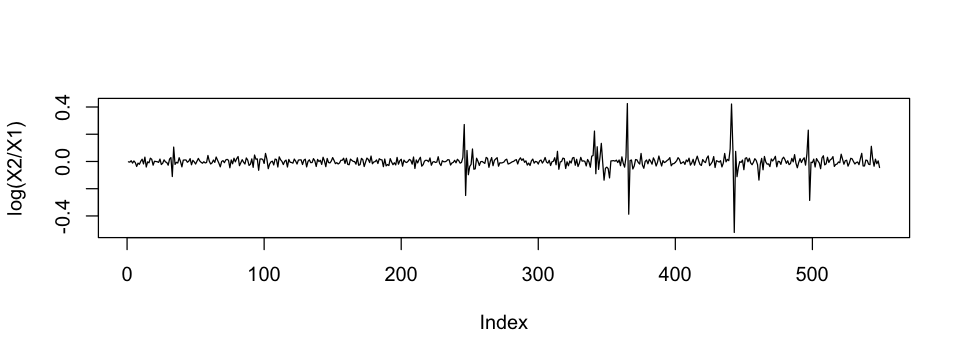

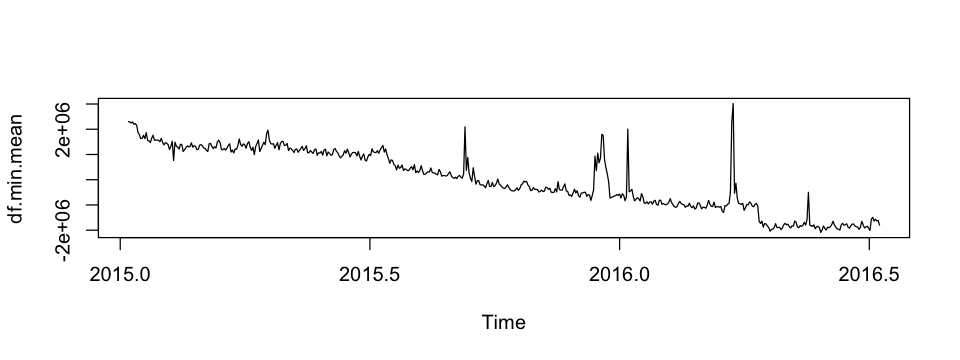

In [128]:
plot(log(X2/X1), type="l")
plot(df.min.mean)